In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import itertools

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline
test_size = 0.33

In [2]:
enrgy_eff_df = pd.read_excel("data.xlsx",names=["Relative Compactness"
,"Surface Area",
"Wall Area",
"Roof Area",
"Overall Height",
"Orientation",
"Glazing Area",
"Glazing Area Distribution",
"Heating Load",
"Cooling Load"])

In [3]:
enrgy_eff_df.columns

Index(['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',
       'Overall Height', 'Orientation', 'Glazing Area',
       'Glazing Area Distribution', 'Heating Load', 'Cooling Load'],
      dtype='object')

In [4]:
X_cols = ["Relative Compactness"
,"Surface Area",
"Wall Area",
"Roof Area",
"Overall Height",
"Orientation",
"Glazing Area",
"Glazing Area Distribution",]
y_cols = ["Heating Load","Cooling Load"]

In [5]:
min_max_scaler = MinMaxScaler()

In [6]:
X, y_heating,y_cooling = enrgy_eff_df[X_cols], enrgy_eff_df["Heating Load"], enrgy_eff_df["Cooling Load"]
X_scaled = min_max_scaler.fit_transform(X)

In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       768 non-null    float64
 1   Surface Area               768 non-null    float64
 2   Wall Area                  768 non-null    float64
 3   Roof Area                  768 non-null    float64
 4   Overall Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing Area               768 non-null    float64
 7   Glazing Area Distribution  768 non-null    int64  
dtypes: float64(6), int64(2)
memory usage: 48.1 KB


In [8]:
X.nunique(axis=0)

Relative Compactness         12
Surface Area                 12
Wall Area                     7
Roof Area                     4
Overall Height                2
Orientation                   4
Glazing Area                  4
Glazing Area Distribution     6
dtype: int64

<h4>As seen by the minimal number of non-unique values in each column, we can analyze these columns as categorical variables rather than numerical continous values.<br /><br />There are 768 samples in this dataset; however, the highest number of unique values is just 12, demonstrating the large disparity.</h4>

In [9]:
for col in X.columns:
    print(f"{col} unique values {pd.unique(X[col])}")

Relative Compactness unique values [0.98 0.9  0.86 0.82 0.79 0.76 0.74 0.71 0.69 0.66 0.64 0.62]
Surface Area unique values [514.5 563.5 588.  612.5 637.  661.5 686.  710.5 735.  759.5 784.  808.5]
Wall Area unique values [294.  318.5 343.  416.5 245.  269.5 367.5]
Roof Area unique values [110.25 122.5  147.   220.5 ]
Overall Height unique values [7.  3.5]
Orientation unique values [2 3 4 5]
Glazing Area unique values [0.   0.1  0.25 0.4 ]
Glazing Area Distribution unique values [0 1 2 3 4 5]


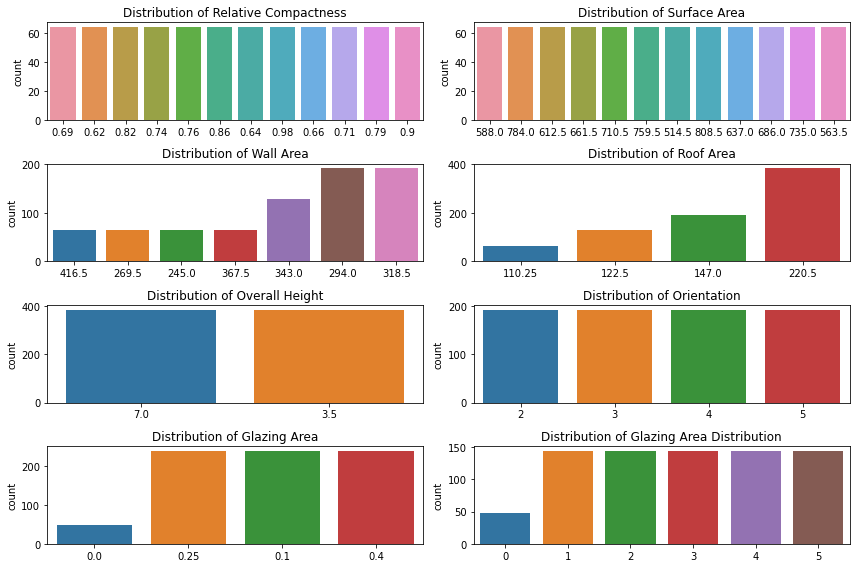

In [10]:
plt.figure(1,(12,8))
for i, col in enumerate(X.columns):
    ax = plt.subplot(4,2,i+1)
    sns.countplot(X[col], order=X[col].value_counts().index[::-1])
    ax.set_xlabel(None)
    ax.set_title(f"Distribution of {col}")
    plt.tight_layout()
    
plt.show()

In [11]:
for col in X.columns:
    val_counts = X[col].value_counts()
    dominant_cat_percent = val_counts.iloc[0]/len(X)*100
    dominant_cat = val_counts.index[0]
    print(f"{dominant_cat} is the dominant value in {col}, it comprises of {round(dominant_cat_percent,3)}% of the data. There are {len(val_counts)} unique values in this {col}")

0.9 is the dominant value in Relative Compactness, it comprises of 8.333% of the data. There are 12 unique values in this Relative Compactness
563.5 is the dominant value in Surface Area, it comprises of 8.333% of the data. There are 12 unique values in this Surface Area
318.5 is the dominant value in Wall Area, it comprises of 25.0% of the data. There are 7 unique values in this Wall Area
220.5 is the dominant value in Roof Area, it comprises of 50.0% of the data. There are 4 unique values in this Roof Area
3.5 is the dominant value in Overall Height, it comprises of 50.0% of the data. There are 2 unique values in this Overall Height
5 is the dominant value in Orientation, it comprises of 25.0% of the data. There are 4 unique values in this Orientation
0.4 is the dominant value in Glazing Area, it comprises of 31.25% of the data. There are 4 unique values in this Glazing Area
5 is the dominant value in Glazing Area Distribution, it comprises of 18.75% of the data. There are 6 unique v

<h3>Insights</h3>
<ol>
    <li>The distribution of relative compactness, surface area, overall height, and orientation is extremely normal, which is ideal.</li>
    <li>The distribution of glazing area and glazing area distribution is slightly skewed to the left.</li>
    <li>Wall area and roof area is more skewed to the left. It is also important to note that a wall area of 318.5 is comprised of 25% of the data, even though there are 7 categories.</li>
</ol>

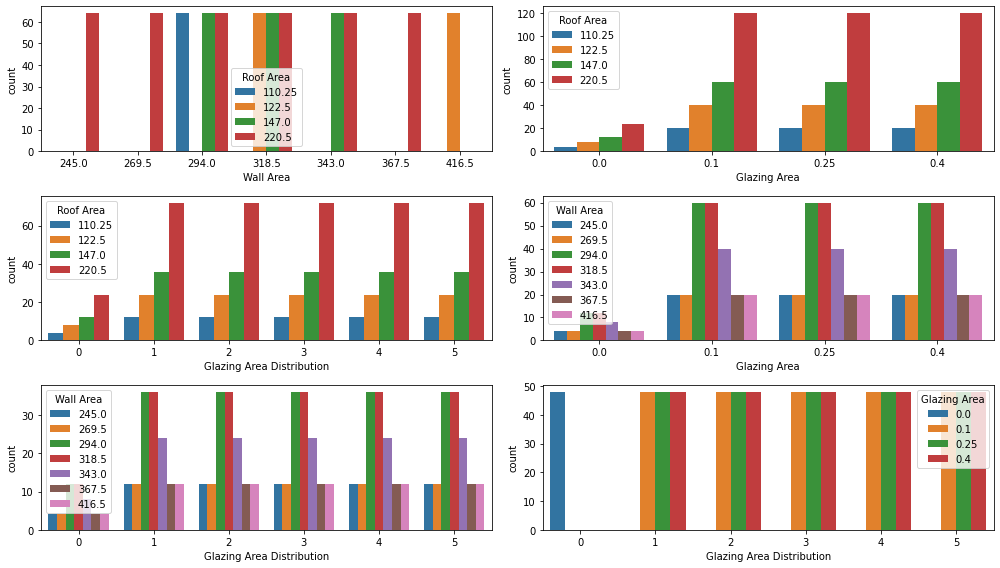

In [12]:
combos = itertools.combinations(["Roof Area","Wall Area","Glazing Area","Glazing Area Distribution"],2)
plt.figure(2,(14,8))
i=1
for pair in combos:
    less_unique_val_cat = pair[0] if len(X[pair[0]].value_counts()) < len(X[pair[1]].value_counts()) else pair[0]
    other_cat = pair[1] if less_unique_val_cat == pair[0] else pair[0]
    ax = plt.subplot(3,2,i)
    i+=1
    sns.countplot(x=other_cat,hue=less_unique_val_cat,data=X)
    plt.tight_layout()
plt.show()

<Figure size 504x1008 with 0 Axes>

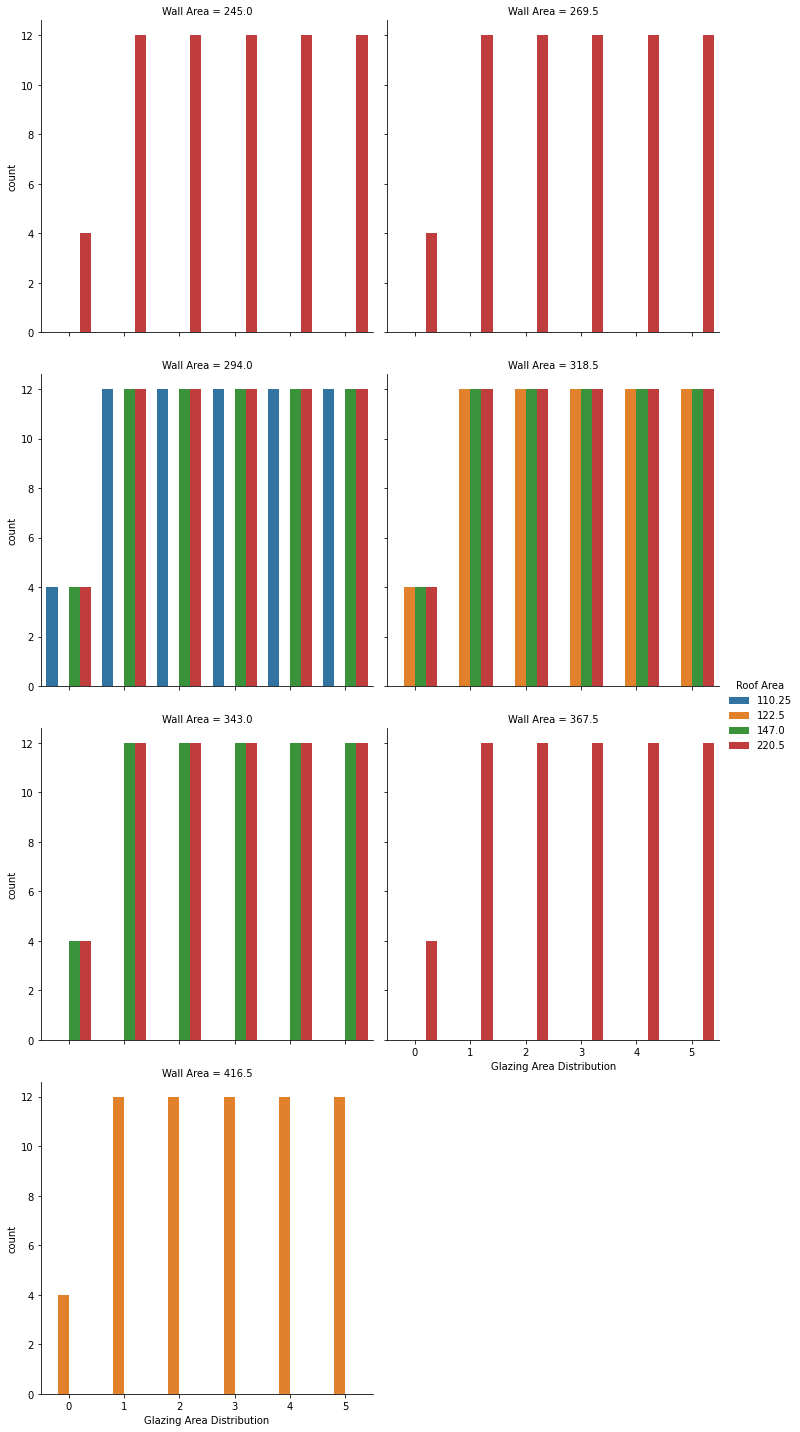

In [26]:
fig = plt.figure(1,(7,14))
sns.catplot(x="Glazing Area Distribution", hue="Roof Area",col="Wall Area",data=X,kind="count",col_wrap=2)

<h2>Insights</h2>
<ol>
    <li>In Glazing Area Distribution, Glazing Area,, and Wall Area, it is blatantly clear a Roof Area of 220.5 is very significant. This makes senses since Roof Area is heavily skewed to the left and 220.5 is the most significant value.</li>
    <li>In Glazing Area Distribution, Glazing Areas are mostly uniform except at a distribution of 0, where Glazing Area of 0 is the only data point. However, this makes sense since an area of 0 also means a distribution of 0.</li>
    <li>The Wall Area distribution of Glazing Area Distribution is clearly concentrated around 294.0 and 318.5, once again displaying the left skew of Wall Area.</li>
</ol>

768

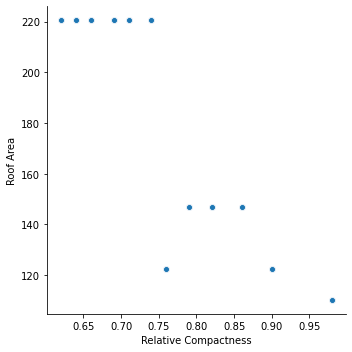

In [28]:
sns.relplot(x="Relative Compactness",y="Roof Area",data=X)

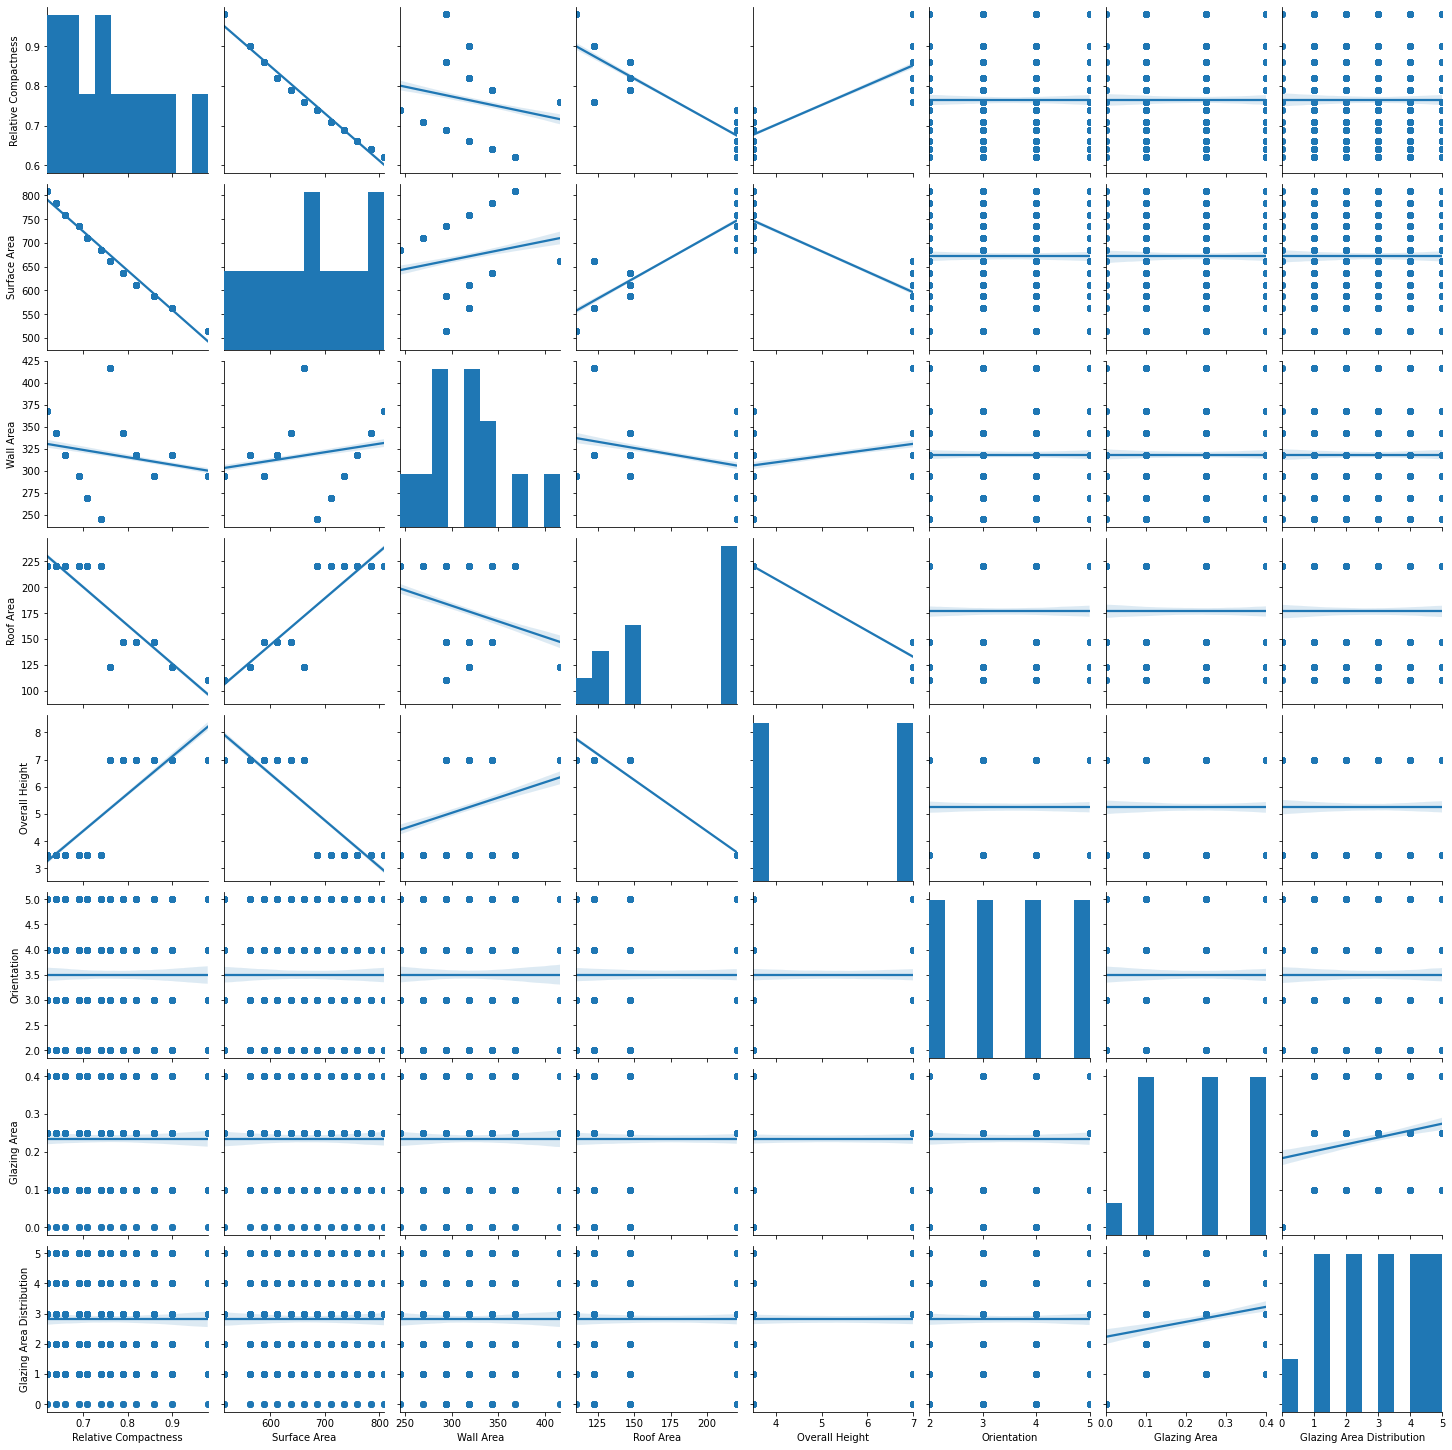

In [34]:
sns.pairplot(X,kind="reg")

<h2>Insights</h2>
<ol>
    <li>When plotting a scatter plot between Relative Compactness (a normally distributed variable) and Roof Area, it seems there is an inverse relationship.</li>
    <li>As Relative Compactness increases, Roof Area decreases</li>
</ol>

In [10]:
fig = plt.figure(figsize=(20,5))

<Figure size 1440x360 with 0 Axes>

In [11]:
for col_num in range(len(X.columns)):
    col_name = X.columns[col_num]
    col_data = X[col_name]
    ax = fig.add_subplot(1,len(X.columns),col_num+1)
    ax.plot(col_data,y_heating)
    ax.set_title(f"Heating Load vs. {col_name}")
    ax.set_xlabel(X.columns[col_num])
    ax.set_ylabel("Heating Load")
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000219D5597208>,
      dtype=object)

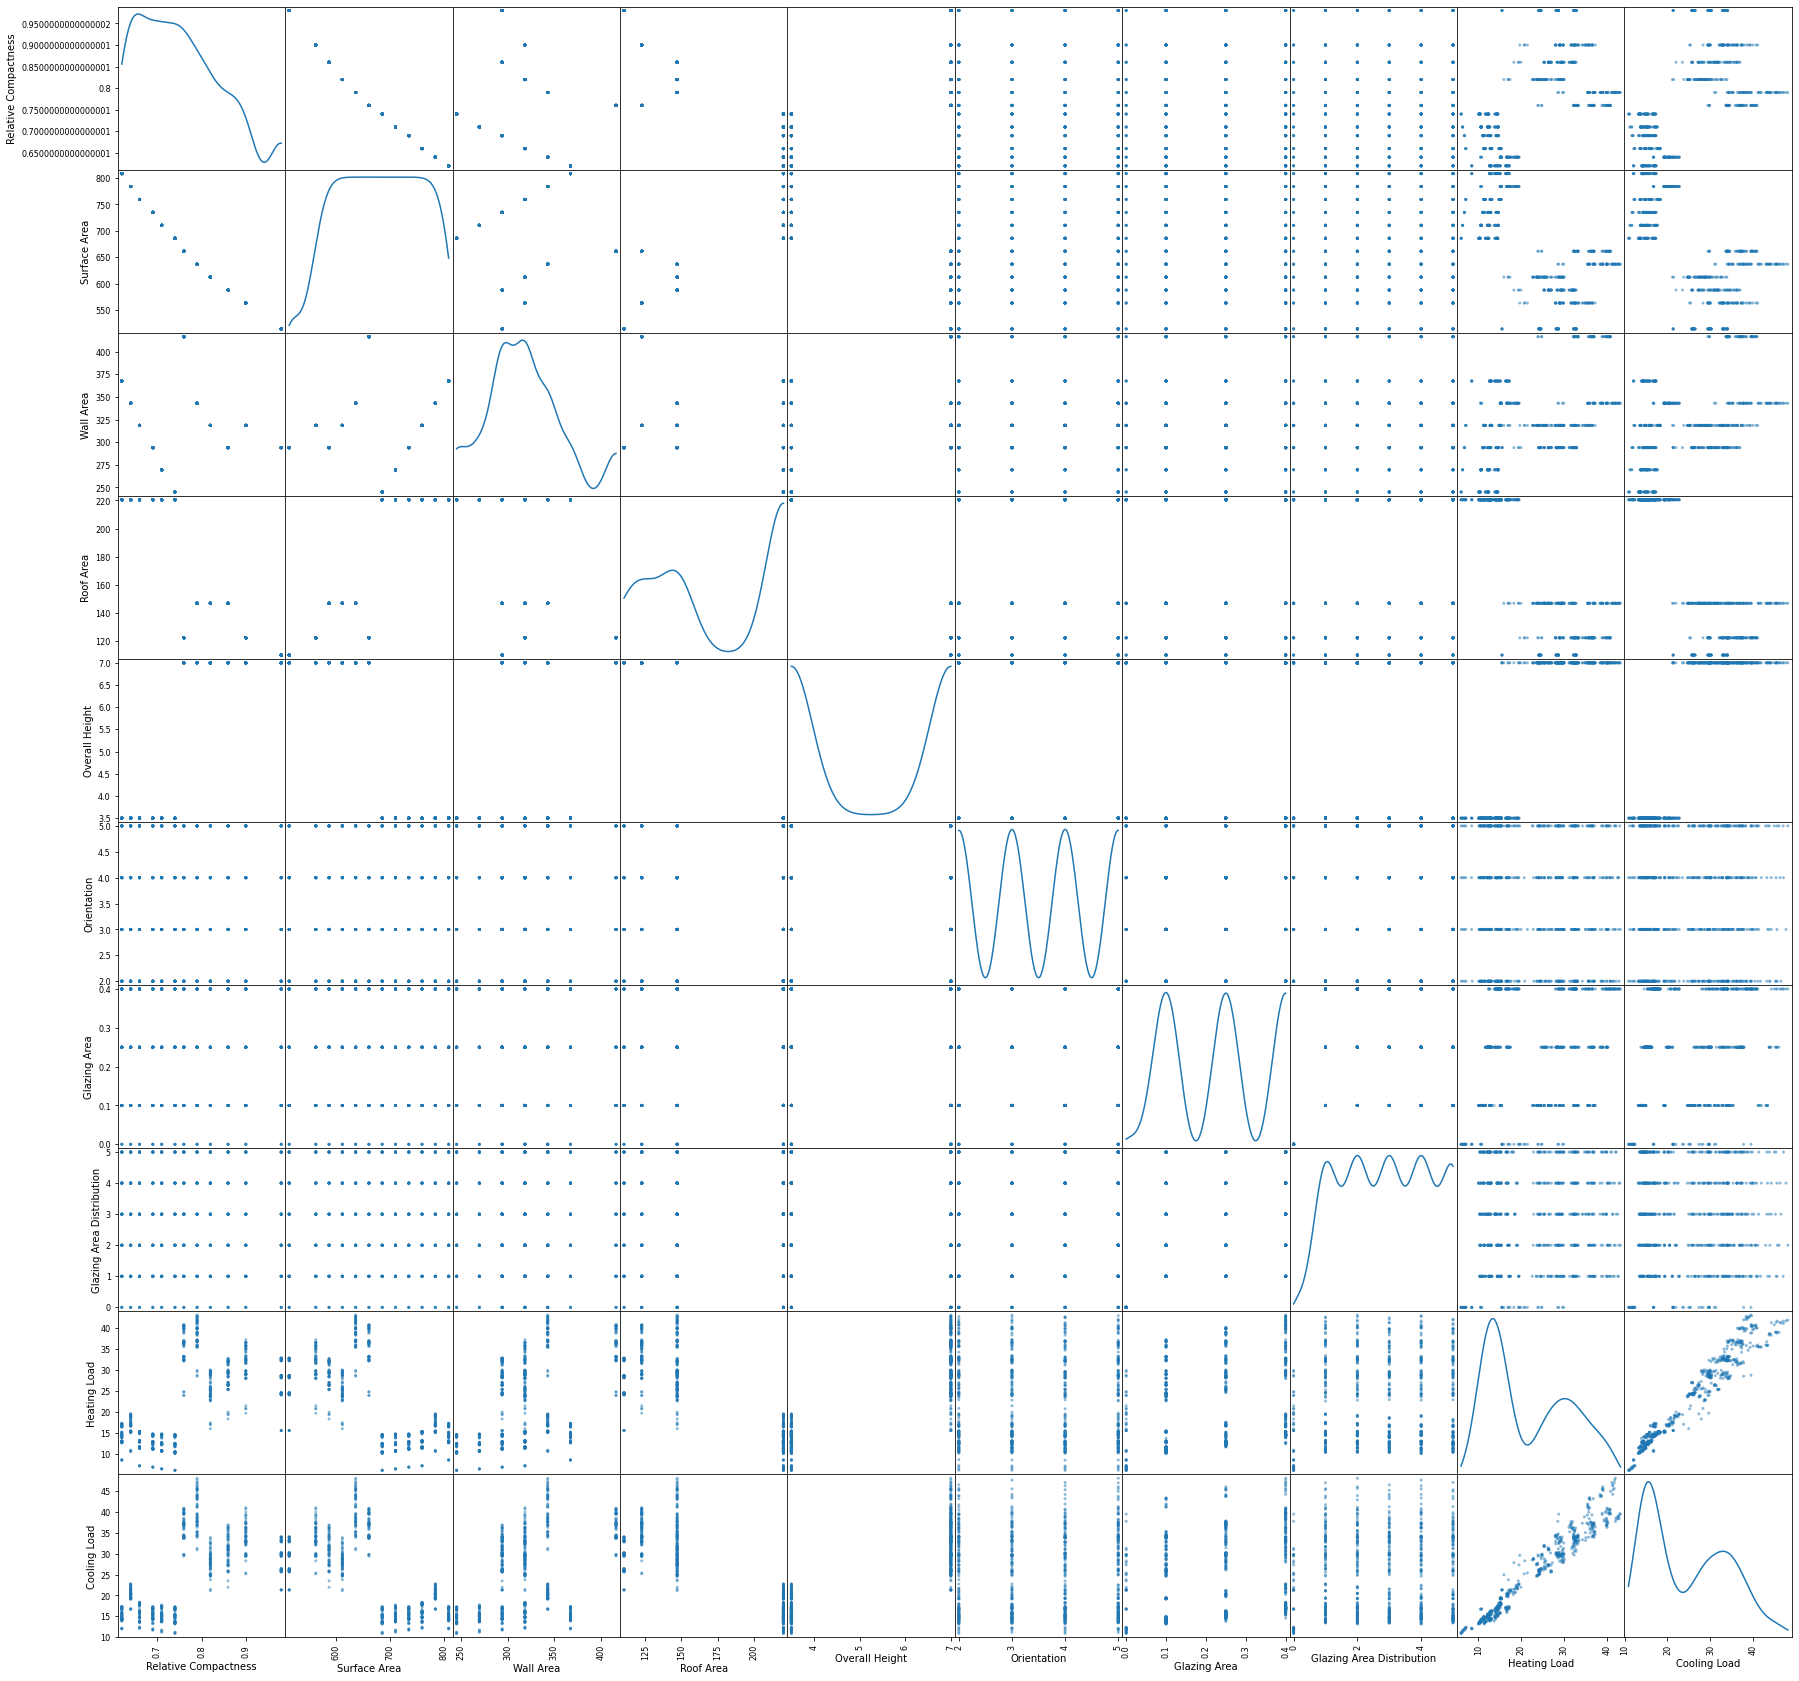

In [10]:
scatter_matrix(enrgy_eff_df,figsize=(30,30),diagonal="kde")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000219DCFA9988>,
      dtype=object)

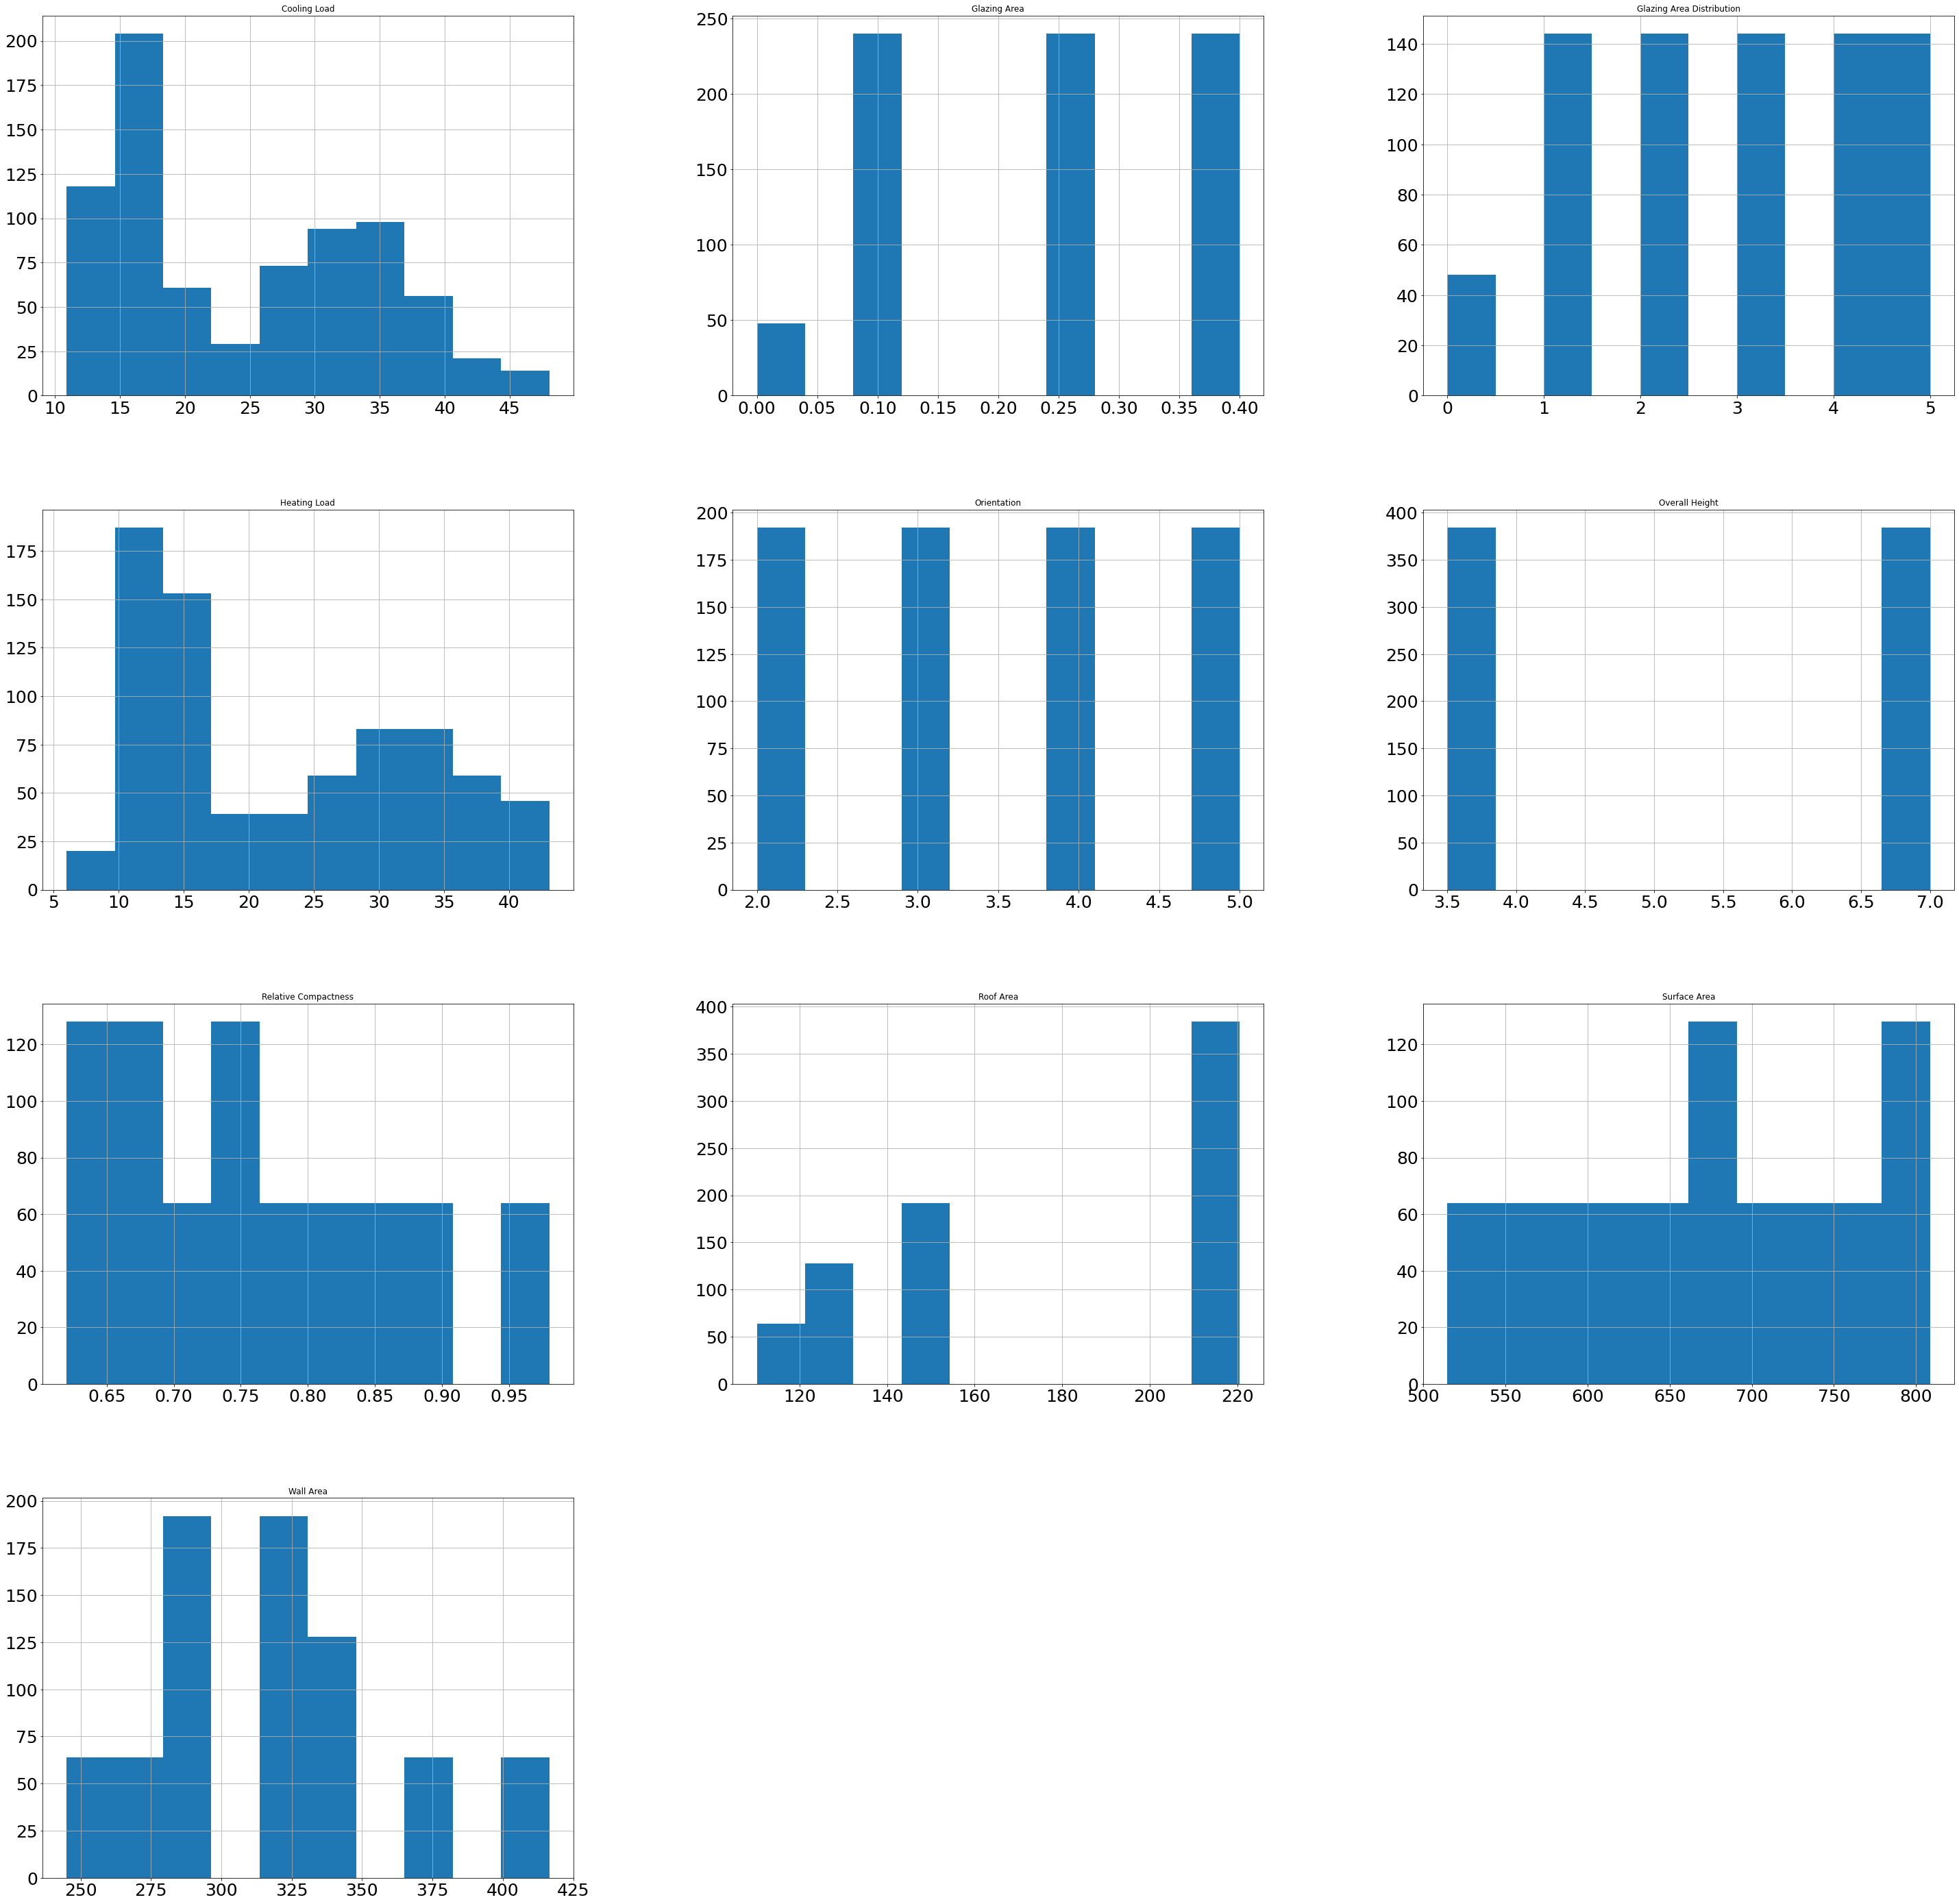

In [11]:
enrgy_eff_df.hist(figsize=(50,50),xlabelsize=25,ylabelsize=25)

768


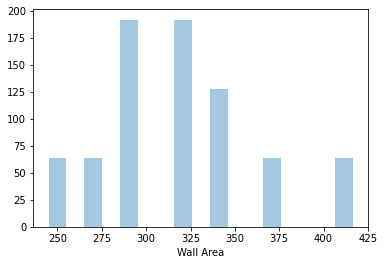

In [12]:
print(len(X["Wall Area"]))
sns.distplot(X.loc[:,"Wall Area"],norm_hist=False,kde=False)

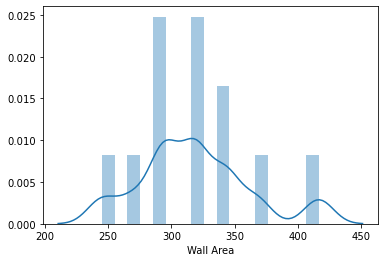

In [13]:
sns.distplot(X.loc[:,"Wall Area"])

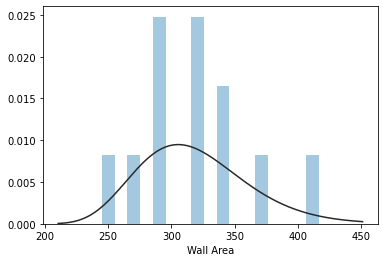

In [14]:
from scipy import stats
# Wall area distribution is slightly skewed to the right, but overall, it seems pretty normal
sns.distplot(X.loc[:,"Wall Area"],fit=stats.gamma,kde=False)

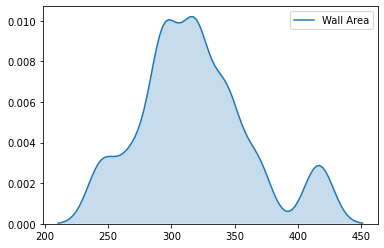

In [15]:
sns.kdeplot(X.loc[:,"Wall Area"],shade=True)

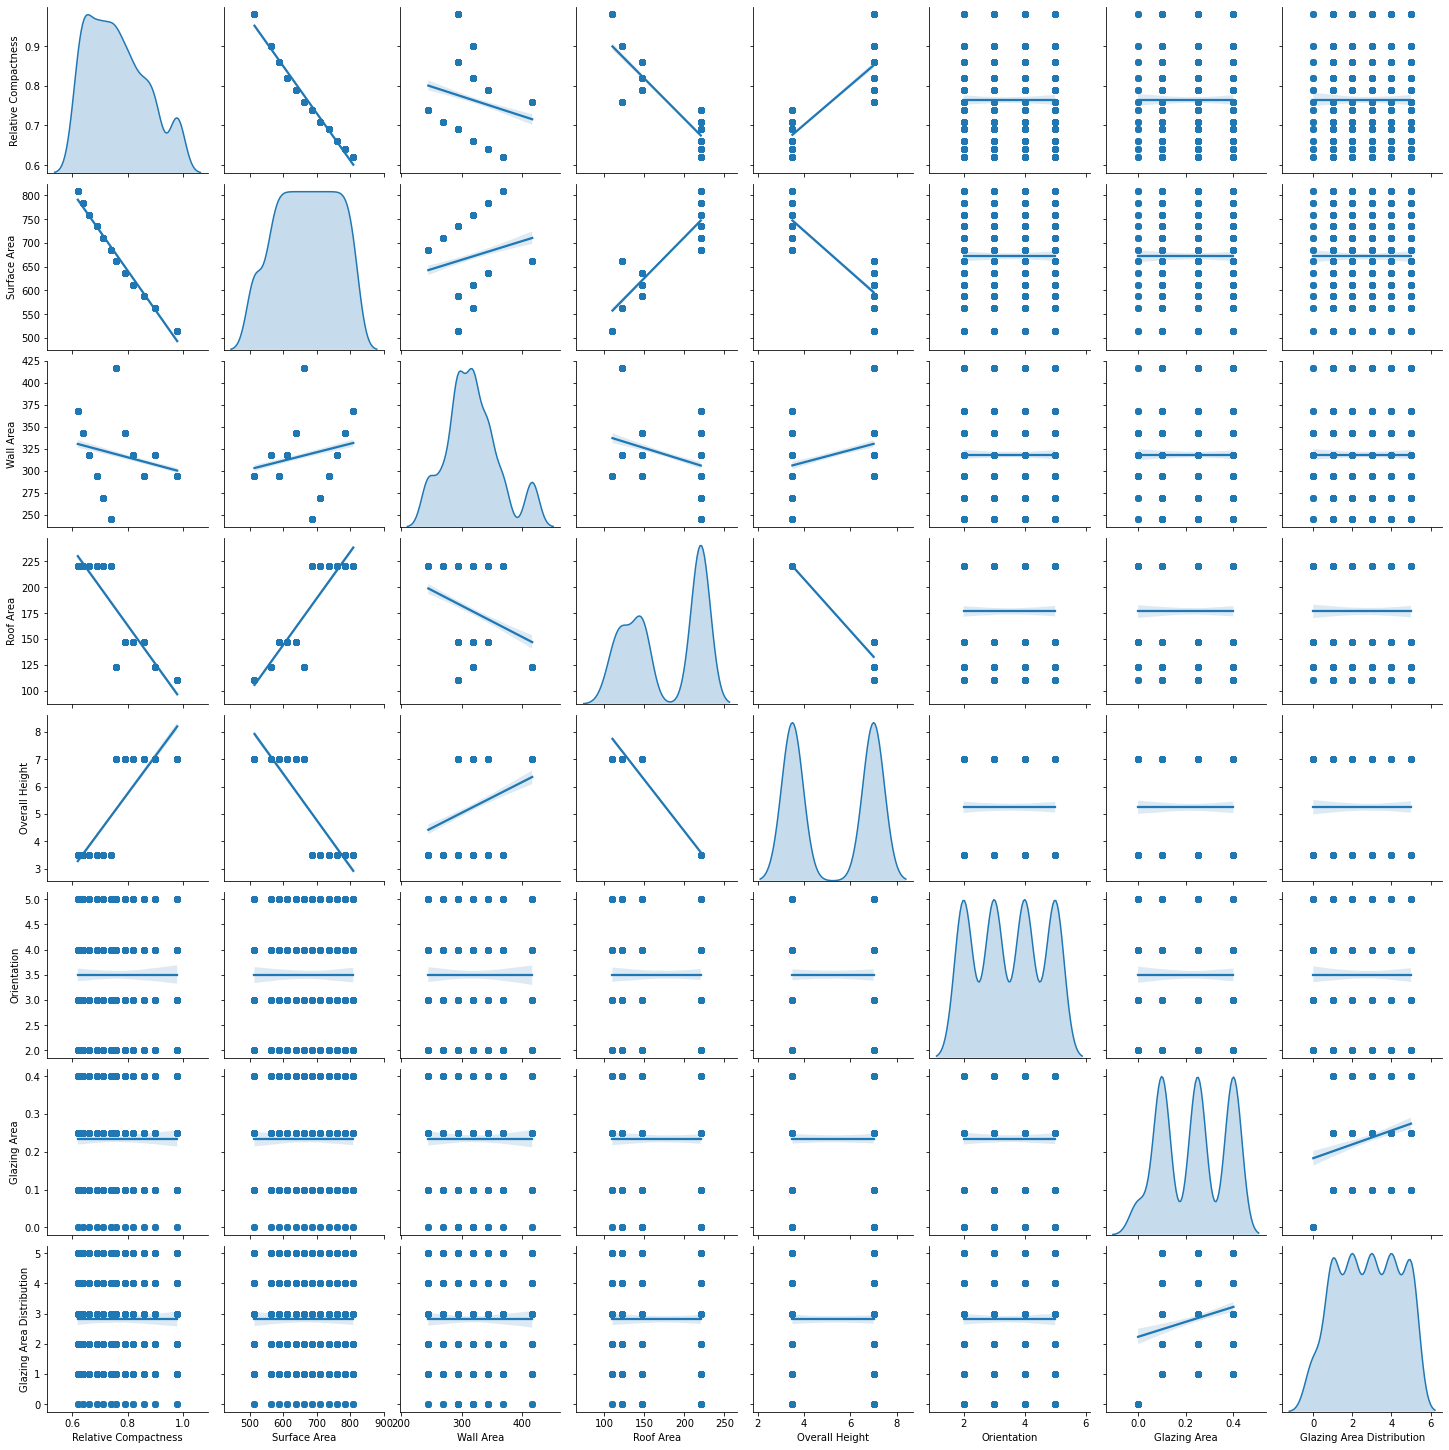

In [18]:
sns.pairplot(X,diag_kind="kde",kind="reg")

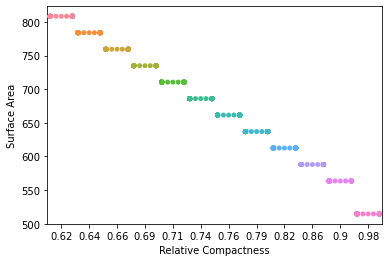

In [26]:
sns.swarmplot(y="Surface Area",x="Relative Compactness",data=X)

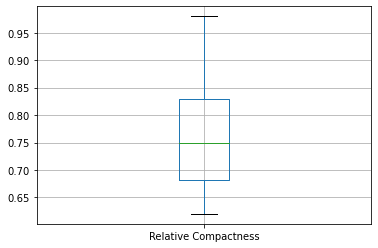

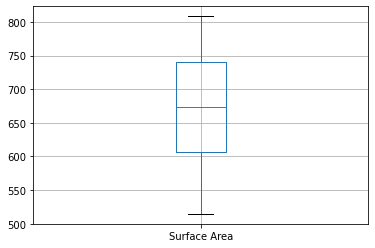

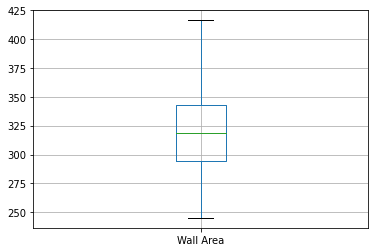

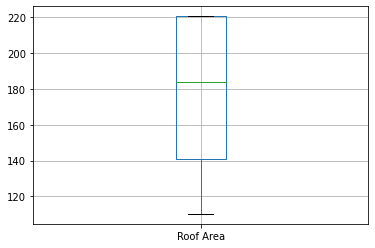

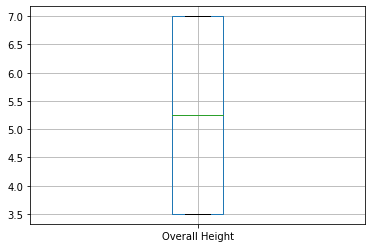

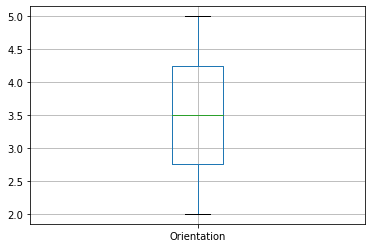

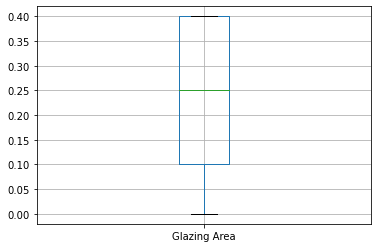

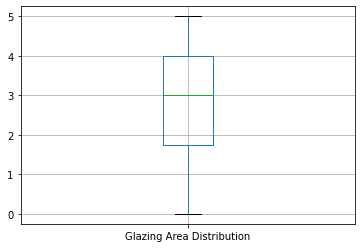

In [40]:
for column in X:
    plt.figure()
    X.boxplot([column])

In [7]:
X_heating_scaled_train, X_heating_scaled_test, y_heating_train, y_heating_test = train_test_split(X_scaled,y_heating,test_size=test_size)
X_cooling_scaled_train, X_cooling_scaled_test, y_cooling_train, y_cooling_test = train_test_split(X_scaled,y_cooling,test_size=test_size)